In [11]:
run  /Users/adrianovaldesgomez/Documents/Adriano_Programming/phd_python_documented_code.py

In [2]:
import time

In [3]:
%config InlineBackend.figure_format ='retina'

In [4]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming'

In [5]:
cd New_Code_Tests/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests


In [7]:
mkdir Y30_2ndSeries

In [7]:
cd Y30_2ndSeries/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests/Y30_2ndSeries


In [6]:
mkdir Test_variable_args

In [6]:
cd Test_variable_args/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests/Test_variable_args


In [25]:
def act_n2_field(arreglo, D, delta_t, v0, field):
    
    #s = ese(D,delta_t)

    arreglo = np.apply_along_axis(actualiza_field, 1, arreglo, ese( D, delta_t), v0, field)
    return arreglo

In [90]:
def act_n_field(lista, v0, field):
    """This funtion updates a list of positions of a set of brownian particles in which there is also
    an external field acting on them"""
    l = []
    D=.1
    for v in lista:
        s = ese(D,dt)
        l.append(actualiza_field(v, s, v0, field))
    return l

In [19]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests/Y30_2ndSeries


In [20]:
mkdir Test2

In [4]:
cd Test2/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests/Y30_2ndSeries/Test2


In [7]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests/Test_variable_args'

In [8]:
D

NameError: name 'D' is not defined

In [12]:
start_time = time.time()
D = 1e-1
dt = np.log(2)*1e-3
v0 = 5*np.sqrt(2*D)*dt
dist_uni = obs_uniforme(1000, 1., 0)
#dist_uni = polo_n(600,1.)
plot_particles(dist_uni, 10, 0, 0, 'Y30_Test')
rs = dist_uni
for i in range(100):
         
        nuevas_pos = act_n_field(rs, v0, field_y30, D,dt)
        plot_particles(nuevas_pos, 10, 0, i + 1,'Y30_Test')
        rs = nuevas_pos
        
elapsed_time = time.time() - start_time
print(elapsed_time)

497.02298283576965


In [13]:
!mencoder "mf://*.png" -o Ani_Y30_Test_01.mov -ovc lavc \
-lavcopts vcodec=msmpeg4v2:autoaspect:vbitrate=2160000:mbd=2:\
                keyint=132:vqblur=1.0:cmp=2\:subcmp=2:dia=2:o=mpv_flags=+mv0:last_pred=3 -fps 1 > File_Out.txt 2>&1;

In [81]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests/Y30_2ndSeries'

# Green-Kubo Formula

In [7]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests/Y30_2ndSeries/Test2'

In [8]:
cd /Users/adrianovaldesgomez/Documents/Adriano_Programming/

/Users/adrianovaldesgomez/Documents/Adriano_Programming


In [12]:
mkdir Green-Kubo

In [13]:
cd Green-Kubo/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Green-Kubo


In [16]:
import time

In [122]:
start_time = time.time()

n_parti = 40000


pos_ini = polo_n(n_parti, 1.)

#pos_ini = obs_uniforme(n_parti, 1., 0)

#pos_ini = np.array(pos_ini)

#D = 1e-12

intensidad = 1.
delta_t = np.log(2)*1e-3
#gamma = Kb*T/D
gamma = 1000.
Kb = 13.8064852
m = 1.47216738
T = 300.
#U0 = 20000*np.sqrt(2*(Kb*T/gamma))

U0 = 0.

l_pos_t = [pos_ini]


#vel_ini = n_vel_ini(np.array([0,0,1.]), n_parti, delta_t, T, m, intensidad, gamma)

vel_ini = [np.array([100,0,0]) for i in range(n_parti)]


l_vel_t = [vel_ini]



theta_mean_t = [0]
#phis_mean = []
theta_var_t = [0]

mean_cos_thetas_t = [1]

#field_theta

for i in range(200):
    
    
    pos_ini, vel_ini = act_ensamble(pos_ini, vel_ini, field_y10, U0, m, T, gamma, delta_t)
    
    
    l_pos_t.append(pos_ini)
    l_vel_t.append(vel_ini)
    



l_pos_t = np.array(l_pos_t)
l_vel_t = np.array(l_vel_t)

np.savetxt("pos_t.txt", theta_var_t)    
np.savetxt("vel_t.txt", mean_cos_thetas_t)  


elapsed_time = time.time() - start_time
print(elapsed_time)

8084.381011009216


In [37]:
type(l_pos_t)

numpy.ndarray

In [38]:
type(l_vel_t)

numpy.ndarray

In [39]:
 Kb * T / gamma

4.14194556

## Cálculo sin transporte paralelo

In [123]:
l_corr_t = [1]
for v in l_vel_t:
    suma = 0
    for w in v:
        suma += np.dot(w, np.array([1,0,0]))
    l_corr_t.append(suma/len(v) * delta_t)

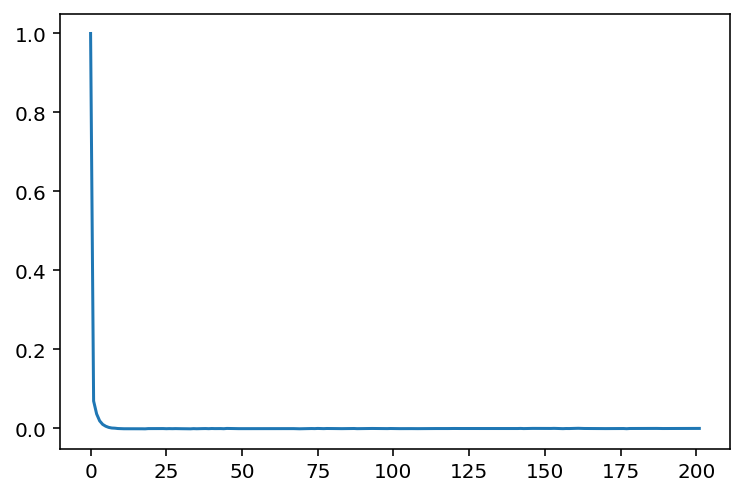

In [124]:
plt.plot(l_corr_t)

In [125]:
type(l_corr_t)

list

In [128]:
sum(l_corr_t)/3

0.35755464040734325

In [127]:
Kb*T/gamma

4.14194556

## Cálculo con transporte paralelo

In [9]:
start_time = time.time()

n_parti = 400


pos_ini = polo_n(n_parti, 1.)

#pos_ini = obs_uniforme(n_parti, 1., 0)

#pos_ini = np.array(pos_ini)

#D = 1e-12

intensidad = 1.
delta_t = np.log(2)*1e-3
#gamma = Kb*T/D
gamma = 1000.
Kb = 13.8064852
m = 1.47216738
T = 300.
#U0 = 20000*np.sqrt(2*(Kb*T/gamma))

U0 = 0.

l_pos_t = [pos_ini]


#vel_ini = n_vel_ini(np.array([0,0,1.]), n_parti, delta_t, T, m, intensidad, gamma)

vel_ini = [np.array([100,0,0]) for i in range(n_parti)]


l_vel_t = [vel_ini]



theta_mean_t = [0]
#phis_mean = []
theta_var_t = [0]

mean_cos_thetas_t = [1]

#field_theta

for i in range(200):
    
    r0 = pos_ini
    
    pos_ini, vel_ini = act_ensamble(pos_ini, vel_ini, field_y10, U0, m, T, gamma, delta_t)
    
    l_vel_pt = []
    for i in range(len(pos_ini)):
    
        N = np.cross(pos_ini[i], r0[i])
        Phi = np.arccos(np.dot(r0[i], pos_ini[i]))
        vel_paral_trans = rot_finita(vel_ini[i], N, Phi)
        l_vel_pt.append(vel_paral_trans)
        #print(vel_paral_trans.shape)
    
    l_pos_t.append(pos_ini)
    l_vel_t.append(l_vel_pt)
    



l_pos_t = np.array(l_pos_t)
l_vel_t = np.array(l_vel_t)

#np.savetxt("pos_pt_t.txt", l_pos_t)    
#np.savetxt("vel_pt_t.txt", l_vel_t)  


elapsed_time = time.time() - start_time
print(elapsed_time)

54.884363889694214


In [129]:
rot_finita?

In [133]:
l_vel_t.shape

(201, 4000, 3)

In [10]:
l_corr_t = [1]
for v in l_vel_t:
    suma = 0
    for w in v:
        suma += np.dot(w, np.array([1,0,0]))
    l_corr_t.append(suma/len(v) * delta_t)

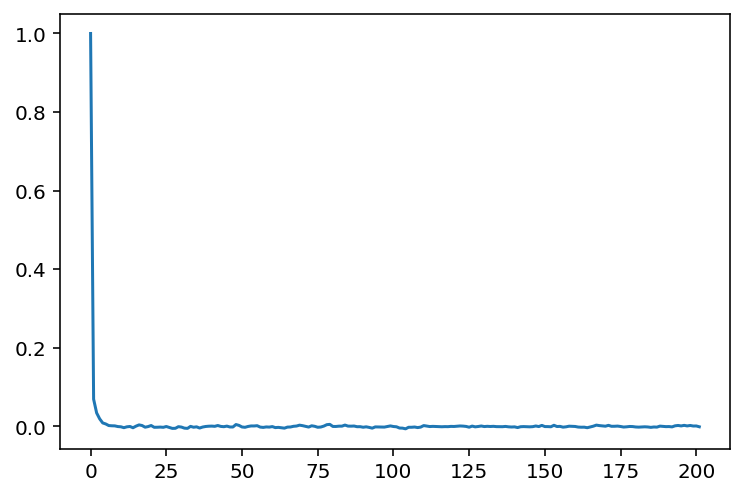

In [11]:
plt.plot(l_corr_t)

In [137]:
sum(l_corr_t)/3

0.3770528249213548

In [138]:
Kb*T/gamma

4.14194556

In [16]:
def Green_Kubo_Sim(n_parti, n_pasos, vel_int0):
    start_time = time.time()

    


    pos_ini = polo_n(n_parti, 1.)

    #pos_ini = obs_uniforme(n_parti, 1., 0)

    #pos_ini = np.array(pos_ini)

    #D = 1e-12

    intensidad = 1.
    delta_t = np.log(2)*1e-3
    #gamma = Kb*T/D
    gamma = 1000.
    Kb = 13.8064852
    m = 1.47216738
    T = 300.
    #U0 = 20000*np.sqrt(2*(Kb*T/gamma))

    U0 = 0.

    l_pos_t = [pos_ini]


    #vel_ini = n_vel_ini(np.array([0,0,1.]), n_parti, delta_t, T, m, intensidad, gamma)

    vel_ini = [np.array([vel_int0,0,0]) for i in range(n_parti)]


    l_vel_t = [vel_ini]


    

    #field_theta

    for i in range(n_pasos):

        r0 = pos_ini

        pos_ini, vel_ini = act_ensamble(pos_ini, vel_ini, field_y10, U0, m, T, gamma, delta_t)

        l_vel_pt = []
        for i in range(len(pos_ini)):

            N = np.cross(pos_ini[i], r0[i])
            Phi = np.arccos(np.dot(r0[i], pos_ini[i]))
            vel_paral_trans = rot_finita(vel_ini[i], N, Phi)
            l_vel_pt.append(vel_paral_trans)
            #print(vel_paral_trans.shape)

        l_pos_t.append(pos_ini)
        l_vel_t.append(l_vel_pt)




    l_pos_t = np.array(l_pos_t)
    l_vel_t = np.array(l_vel_t)

    #np.savetxt("pos_pt_t.txt", l_pos_t)    
    #np.savetxt("vel_pt_t.txt", l_vel_t)  
    elapsed_time = time.time() - start_time
    return l_pos_t, l_vel_t, elapsed_time



In [13]:
def vel_auto_corr(l_vel_t):
    l_corr_t = [1]
    for v in l_vel_t:
        suma = 0
        for w in v:
            suma += np.dot(w, np.array([1,0,0]))
        l_corr_t.append(suma/len(v) * delta_t)
    return l_corr_t

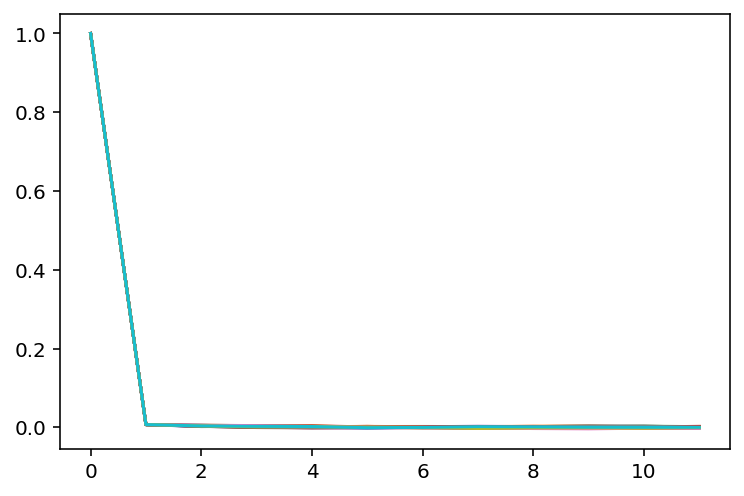

111.75187802314758


In [76]:
start_time = time.time()
vel_ini = [np.array([100,0,0]) for i in range(n_parti)]
tiempos_sim = []
Ds = []
for i in range(1,21,1):
    
    l_pos_t, l_vel_t, elapsed_time = Green_Kubo_Sim(1000, 10, 10)
    tiempos_sim.append(elapsed_time)
    Ds.append(sum(l_corr_t)/2)
    l_corr_t = vel_auto_corr(l_vel_t)
    plt.plot(l_corr_t)
plt.show()
elapsed_time = time.time() - start_time
print(elapsed_time)

In [77]:
Ds

[0.5674958152456947,
 0.5040873705729941,
 0.5043379595828613,
 0.5116261742466889,
 0.5061029467182544,
 0.5083279429631358,
 0.5079841009535225,
 0.5023932608248672,
 0.5079754010558043,
 0.509276092815233,
 0.503532592165948,
 0.5078161686170881,
 0.5126007795096824,
 0.5120915096727766,
 0.5141469648545051,
 0.5005050610084324,
 0.5003014493298581,
 0.5031133696272715,
 0.5097016317924017,
 0.5026922682390418]

In [78]:
Ds_array = np.array(Ds)

In [79]:
Ds_array.mean()

0.509805442989803

In [80]:
Ds_array.std()

0.013818957791786908

# Test for obstacles inclusion

In [16]:
def test_fun(l_pos, l_vel, lis_obs = None):
    if lis_obs == None:
        mensaje = 'Rutina sin obstáculos!'
        print(mensaje)
    else:
        mensaje = 'Rutina con Obstáculos!'
        print(mensaje)
    return 
    

In [17]:
test_fun([1,1], [2,2],)

Rutina sin obstáculos!


# Implementation

In [18]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests'

In [19]:
mkdir Fields_and_Obstacles

In [20]:
cd Fields_and_Obstacles/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests/Fields_and_Obstacles


In [24]:
def field_null(pos,U0,t):
    if t == None:
        return U0 * np.array([1,1,1])
    else:
        return U0 * np.array([1,1,1]) * t

In [85]:
run  /Users/adrianovaldesgomez/Documents/Adriano_Programming/phd_python_documented_code.py

<Figure size 432x288 with 0 Axes>

In [37]:
l_obs = obs_uniforme(100, 0.1, .25)

In [33]:
matplotlib inline

In [46]:
lobs_6p = secuencia_obs(4*np.pi*(2), 3*2, 3)
est_6p = puntos_obs(lobs_6p, np.pi/12)

Ntheta 4 Nphi 6 Ntheta*Nphi 24
24


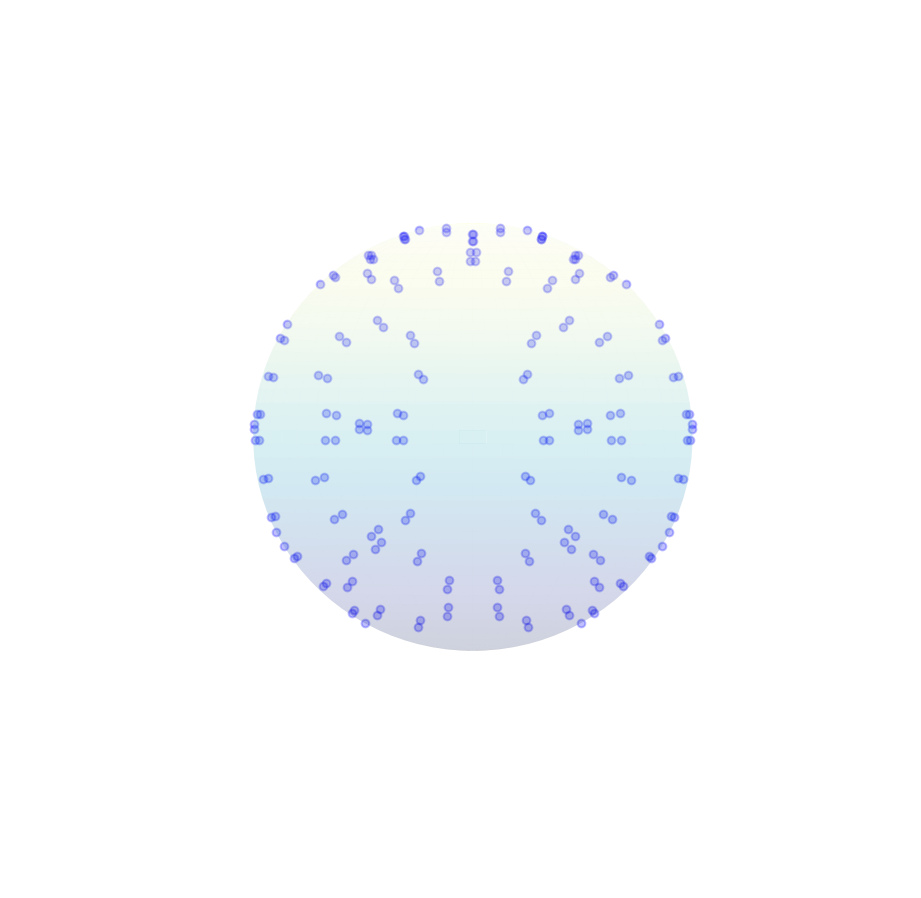

In [49]:
plot_particles(est_6p, 0,0,0,'Titulo')

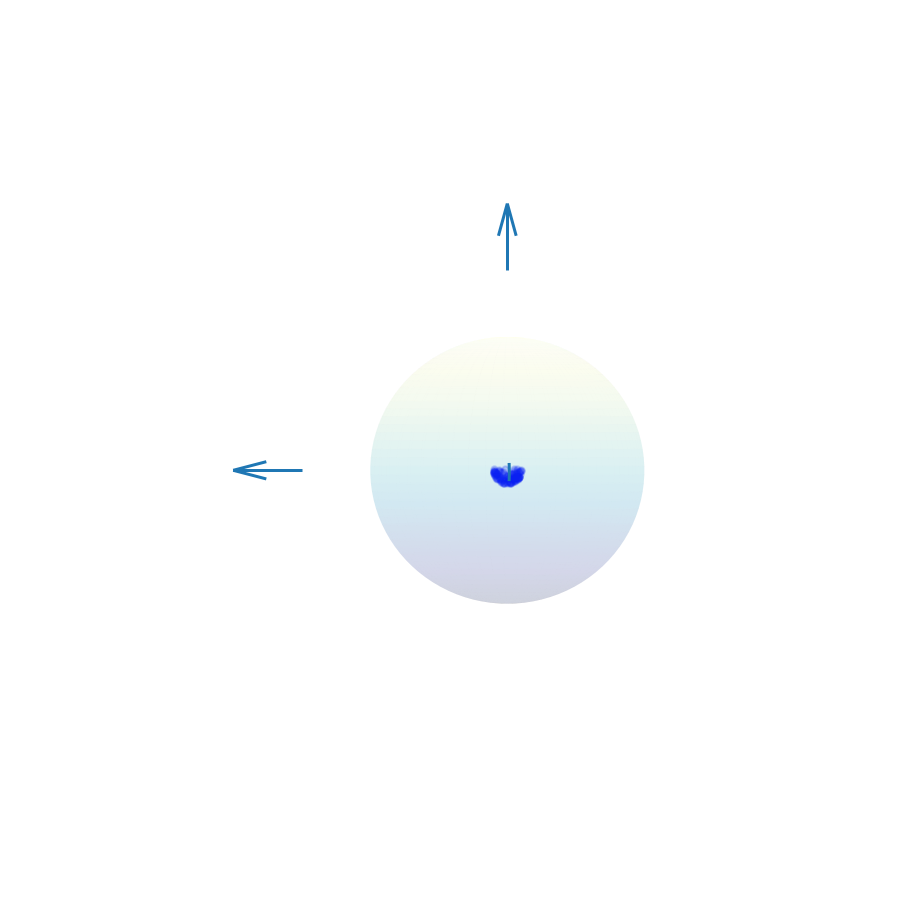

In [40]:
plot_particle_traj_obs(l_obs, [],  0, 90, 0)

In [31]:
v = 1./np.sqrt(3)
size_std = np.pi/9
list_obs_estandar = [np.array([v,v,v]),np.array([-v,v,v]),np.array([v,-v,v]),np.array([-v,-v,v]),np.array([v,v,-v]),np.array([-v,v,-v]),np.array([v,-v,-v]),np.array([-v,-v,-v])]

In [32]:
estruc_std = puntos_obs(list_obs_estandar, np.pi/9, 32)

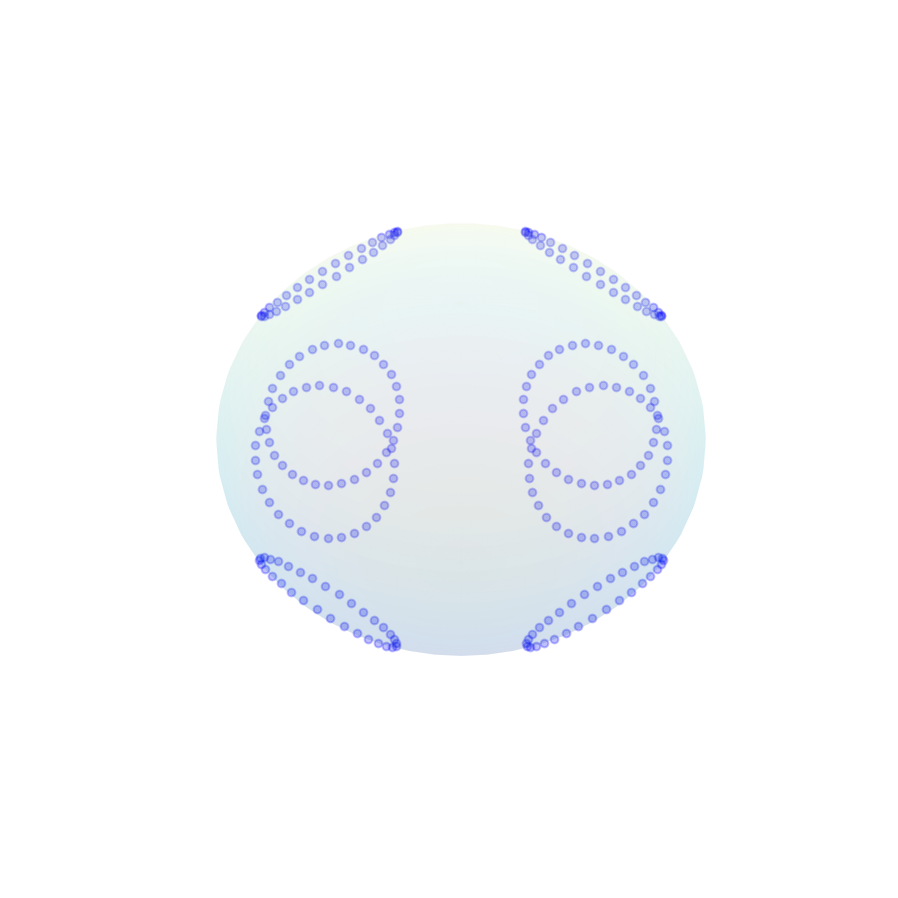

In [33]:
plot_particles(estruc_std,45,0,0,'Título')

In [80]:
titulo = 'Kramers_Obstacles'

In [81]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests/Fields_and_Obstacles'

In [82]:
mkdir Eight_Obst_Test01

In [83]:
cd Eight_Obst_Test01/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests/Fields_and_Obstacles/Eight_Obst_Test01


In [91]:
start = time.time()


# INITIAL DISTRIBUTION OF PARTICLESS

n_parti = 2000



pos_ini = polo_n(n_parti, 1.)

#pos_ini = obs_uniforme(n_parti, 1., 0)

#pos_ini = np.array(pos_ini)

#D = 1e-12

#################################################################################################
#################################################################################################
# OBSTACLES PARAMETERS

sensitiveness = 10
#l_obs = None
l_obs = list_obs_estandar
size_obs = np.pi/9

vpolar = 0
vazim = 0


intensidad = 1.
delta_t = np.log(2)*1e-3
#gamma = Kb*T/D
gamma = 1000.
Kb = 13.8064852
m = 1.47216738
T = 300.
#U0 = 20000*np.sqrt(2*(Kb*T/gamma))

U0 = 0.

l_pos_t = [pos_ini]


vel_ini = n_vel_ini(np.array([0,0,1.]), n_parti, delta_t, T, m, intensidad, gamma)

#vel_ini = [np.array([100,0,0]) for i in range(n_parti)]


l_vel_t = [vel_ini]


plot_particle_traj_obs(estruc_std, pos_ini,  vpolar, vazim, 0, titulo)

t = 0

for index in range(600):
    
    t += (index + 1) * delta_t
    
    if l_obs == None:
        pos_ini, vel_ini = act_ensamble(pos_ini, vel_ini, field_null, U0, m, T, gamma, delta_t)
    else:
        # This should be made a function to look cleaner
        
        to_update = pos_ini
        tentative_paths = []
        updated_pos_at_t = []
        # Here it would be desireble; more economic computational speaking, to update just the position
        # of the particles using the velocities, but leave the velocities untouch.
        tentative_pos, tentaive_vel = act_ensamble(pos_ini, vel_ini, field_null, U0, m, T, gamma, delta_t)
        
        # Generates the points between initial and final points for each particle called the path
        
        for j in range(len(tentative_pos)):
            tentative_paths.append(b_steps_(to_update[j], tentative_pos[j], sensitiveness))
            
        # In this part we check which paths intersect an obstacle

        for path in tentative_paths:
            if check_collision(path, l_obs, size_obs):
                for k in range(1,len(path)):
                    if check_collision([path[k]], l_obs, size_obs):
                        updated_pos_at_t.append(path[k - 1])
                        break
            else:
                updated_pos_at_t.append(path[-1])
        # Here it is the problem!
        pos_ini, vel_ini = act_ensamble(updated_pos_at_t, vel_ini, field_null, U0, m, T, gamma, delta_t)
    
    l_pos_t.append(updated_pos_at_t)
    l_vel_t.append(vel_ini)
    
    pos_ini = updated_pos_at_t
    
    plot_particle_traj_obs(estruc_std, pos_ini,  vpolar, vazim, index, titulo)



l_pos_t = np.array(l_pos_t)
l_vel_t = np.array(l_vel_t)

np.savetxt("pos_t.txt", l_pos_t)    
np.savetxt("vel_t.txt", l_vel_t)  


end = time.time()
print(end - start)

4757.068099975586


In [92]:
!mencoder "mf://*.png" -o Kramers_8Obs_Null_Field_01.mov -ovc lavc \
-lavcopts vcodec=msmpeg4v2:autoaspect:vbitrate=2160000:mbd=2:\
                keyint=132:vqblur=1.0:cmp=2\:subcmp=2:dia=2:o=mpv_flags=+mv0:last_pred=3 -fps 1 > File_Out.txt 2>&1;

In [28]:
l_pos_t.shape

(201, 40, 3)

In [97]:
def adapted_path(pos_ini, vel_ini, field, U0, m, T, gamma, delta_t, l_obs, size_obs):
    to_update = pos_ini
    tentative_paths = []
    updated_pos_at_t = []
    # Here it would be desireble; more economic computational speaking, to update just the position
    # of the particles using the velocities, but leave the velocities untouch.
    tentative_pos, tentaive_vel = act_ensamble(pos_ini, vel_ini, field, U0, m, T, gamma, delta_t)

    # Generates the points between initial and final points for each particle called the path

    for j in range(len(tentative_pos)):
        tentative_paths.append(b_steps_(to_update[j], tentative_pos[j], sensitiveness))

    # In this part we check which paths intersect an obstacle

    for path in tentative_paths:
        if check_collision(path, l_obs, size_obs):
            for k in range(1,len(path)):
                if check_collision([path[k]], l_obs, size_obs):
                    updated_pos_at_t.append(path[k - 1])
                    break
        else:
            updated_pos_at_t.append(path[-1])
            
    return updated_pos_at_t

In [109]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests/Fields_and_Obstacles


In [110]:
mkdir EightObs_Y10_Test01

In [111]:
cd EightObs_Y10_Test01/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests/Fields_and_Obstacles/EightObs_Y10_Test01


In [101]:
run  /Users/adrianovaldesgomez/Documents/Adriano_Programming/phd_python_documented_code.py

<Figure size 432x288 with 0 Axes>

In [112]:
start = time.time()


# INITIAL DISTRIBUTION OF PARTICLESS

n_parti = 1000



pos_ini = polo_n(n_parti, 1.)

#pos_ini = obs_uniforme(n_parti, 1., 0)

#pos_ini = np.array(pos_ini)

#D = 1e-12

#################################################################################################
#################################################################################################
# OBSTACLES PARAMETERS

sensitiveness = 10
#l_obs = None
l_obs = list_obs_estandar
size_obs = np.pi/9

vpolar = 0
vazim = 0


intensidad = 1.
delta_t = np.log(2)*1e-3
#gamma = Kb*T/D
gamma = 1000.
Kb = 13.8064852
m = 1.47216738
T = 300.
#U0 = 20000*np.sqrt(2*(Kb*T/gamma))

D = Kb * T / gamma

U0 = 5 * np.sqrt(2 * D) * 4000

l_pos_t = [pos_ini]


vel_ini = n_vel_ini(np.array([0,0,1.]), n_parti, delta_t, T, m, intensidad, gamma)

#vel_ini = [np.array([100,0,0]) for i in range(n_parti)]


l_vel_t = [vel_ini]


plot_particle_traj_obs(estruc_std, pos_ini,  vpolar, vazim, 0, titulo)

t = 0

for index in range(600):
    
    t += (index + 1) * delta_t
    
    if l_obs == None:
        pos_ini, vel_ini = act_ensamble(pos_ini, vel_ini, field_y10, U0, m, T, gamma, delta_t)
    else:
        # This should be made a function to look cleaner
        
        updated_pos_at_t = adapted_path(pos_ini, vel_ini, field_y10, U0, m, T, gamma, delta_t, l_obs, size_obs)
        pos_ini, vel_ini = act_ensamble(updated_pos_at_t, vel_ini, field_y10, U0, m, T, gamma, delta_t)
    
    l_pos_t.append(updated_pos_at_t)
    l_vel_t.append(vel_ini)
    
    pos_ini = updated_pos_at_t
    
    plot_particle_traj_obs(estruc_std, pos_ini,  vpolar, vazim, index, titulo)



l_pos_t = np.array(l_pos_t)
l_vel_t = np.array(l_vel_t)

#np.savetxt("pos_t.txt", theta_var_t)    
#np.savetxt("vel_t.txt", mean_cos_thetas_t)  


end = time.time()
print(end - start)

2294.6748518943787


In [114]:
!mencoder "mf://*.png" -o Kramers_8Obs_Field_Y10_01.mov -ovc lavc \
-lavcopts vcodec=msmpeg4v2:autoaspect:vbitrate=2160000:mbd=2:\
                keyint=132:vqblur=1.0:cmp=2\:subcmp=2:dia=2:o=mpv_flags=+mv0:last_pred=3 -fps 1 > File_Out.txt 2>&1;



\begin{align}
\mathbf{v} \cdot \mathbf{w} = |\mathbf{v}||\mathbf{w}| \cos{\theta}
\end{align}

$\theta$ el ángulo menor que hacen $\mathbf{v}$ y $\mathbf{w}$


Entonces un criterio para saber si éste ángulo es menor al tamaño de los obstáculos es el siguiente. Como $|\mathbf{v}| = |\mathbf{w}| = 1$, porque estamos en la esfera unitaria


$$\theta = \arccos{\mathbf{v} \cdot \mathbf{w}}$$


In [55]:
def init_uni_dist_out_obs(n_part, l_obs, obs_size):
    """This function generates a uniform initial distribution of particles in which all of 
    them are outside of all obstacles in the list l_obs"""
    l_part = []
    omega = np.cos(obs_size)
    while len(l_part) < n_part:
        # We generate a possible location for particle n
        x, y, z = np.random.uniform(-1,1), np.random.uniform(-1,1), np.random.uniform(-1,1)
        v = np.array([x, y, z])
        norma = np.linalg.norm(v)
        if norma <= 1:
            n = v/norma
        # Then we check whether this particle lies inside one of the obstacles
            l_trues = []
            for obs in l_obs:
                if not np.dot(n, obs) > omega:
                    l_trues.append(True)
            if sum(l_trues) == len(l_obs):
                l_part.append(n)
                
    return l_part

In [72]:
run  /Users/adrianovaldesgomez/Documents/Adriano_Programming/phd_python_documented_code.py

In [27]:
part_test = obs_uniforme_S2(500, np.pi/2)

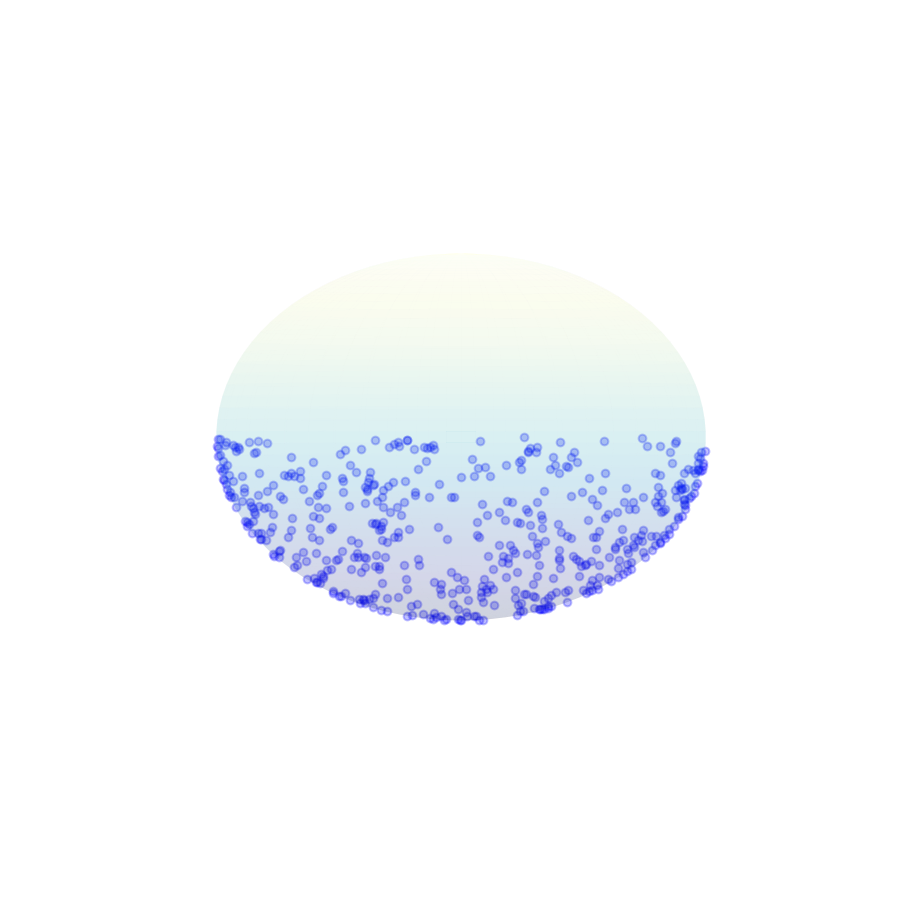

CPU times: user 5.23 s, sys: 21.7 ms, total: 5.25 s
Wall time: 4.05 s


In [28]:
%%time
plot_particles(part_test, 0, 0, 0, 'titulo')

In [47]:
sum([True,True,False,False])

2

In [63]:
dist_ini = init_uni_dist_out_obs(1000, list_obs_estandar, np.pi/9)

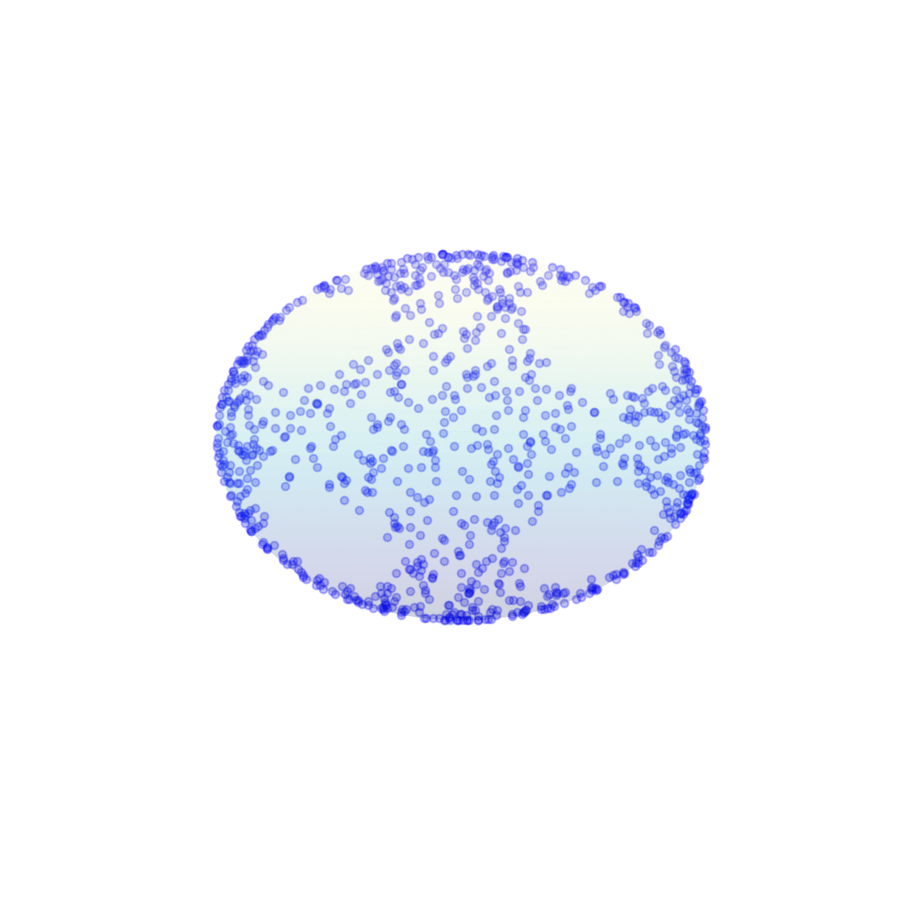

CPU times: user 9.45 s, sys: 45.2 ms, total: 9.5 s
Wall time: 8.32 s


In [64]:
%%time
plot_particles(dist_ini, 0, 0, 0, 'titulo')

In [65]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests/Test_variable_args'

In [66]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests


In [67]:
mkdir Init_dis_Uni_y30

In [68]:
cd Init_dis_Uni_y30/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests/Init_dis_Uni_y30


KeyboardInterrupt: 

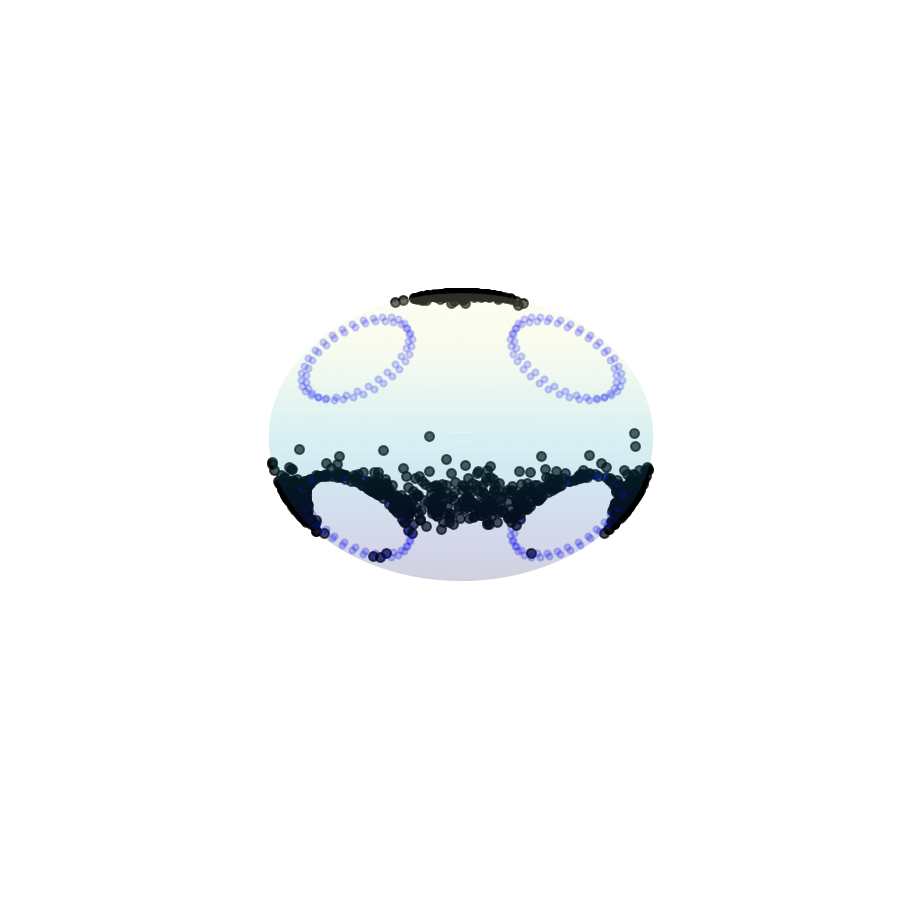

In [73]:
start = time.time()

titulo = 'UniIniDis_Kram_y30'

# INITIAL DISTRIBUTION OF PARTICLESS

n_parti = 1000



#pos_ini = polo_n(n_parti, 1.)

#pos_ini = obs_uniforme(n_parti, 1., 0)

#pos_ini = np.array(pos_ini)


pos_ini = init_uni_dist_out_obs(n_parti, list_obs_estandar, np.pi/9)

#D = 1e-12

#################################################################################################
#################################################################################################
# OBSTACLES PARAMETERS

sensitiveness = 10
#l_obs = None
l_obs = list_obs_estandar
size_obs = np.pi/9

vpolar = 0
vazim = 0


intensidad = 1.
delta_t = np.log(2)*1e-3
#gamma = Kb*T/D
gamma = 1000.
Kb = 13.8064852
m = 1.47216738
T = 300.
#U0 = 20000*np.sqrt(2*(Kb*T/gamma))

D = Kb * T / gamma

U0 = 5 * np.sqrt(2 * D) * 4000

l_pos_t = [pos_ini]


vel_ini = n_vel_ini(np.array([0,0,1.]), n_parti, delta_t, T, m, intensidad, gamma)

#vel_ini = [np.array([100,0,0]) for i in range(n_parti)]


l_vel_t = [vel_ini]


plot_particle_traj_obs(estruc_std, pos_ini,  vpolar, vazim, 0, titulo)

t = 0

for index in range(600):
    
    t += (index + 1) * delta_t
    
    if l_obs == None:
        pos_ini, vel_ini = act_ensamble(pos_ini, vel_ini, field_y30, U0, m, T, gamma, delta_t)
    else:
        # This should be made a function to look cleaner
        
        updated_pos_at_t = adapted_path(pos_ini, vel_ini, field_y30, U0, m, T, gamma, delta_t, l_obs, size_obs,
                                       sensitiveness)
        pos_ini, vel_ini = act_ensamble(updated_pos_at_t, vel_ini, field_y30, U0, m, T, gamma, delta_t)
    
    l_pos_t.append(updated_pos_at_t)
    l_vel_t.append(vel_ini)
    
    pos_ini = updated_pos_at_t
    
    plot_particle_traj_obs(estruc_std, pos_ini,  vpolar, vazim, index, titulo)



#l_pos_t = np.array(l_pos_t)
#l_vel_t = np.array(l_vel_t)

#np.savetxt("pos_t.txt", theta_var_t)    
#np.savetxt("vel_t.txt", mean_cos_thetas_t)  


end = time.time()
print(end - start)

In [71]:
sensitiveness

10

In [74]:
!mencoder "mf://*.png" -o Kramers_8Obs_Field_Y30_01.mov -ovc lavc \
-lavcopts vcodec=msmpeg4v2:autoaspect:vbitrate=2160000:mbd=2:\
                keyint=132:vqblur=1.0:cmp=2\:subcmp=2:dia=2:o=mpv_flags=+mv0:last_pred=3 -fps 1 > File_Out.txt 2>&1;

In [96]:
def field_harmonic(ri,v0,t, omega):
    """This field is harmonic in time and has azimuthal symmetry"""
    
    r, theta, phi = trans_c_s(ri[0], ri[1], ri[2])
    
    theta_field = np.sin(8 * theta) * np.cos(omega * t)
    
    phi_field = 0.
    
    
    field = v0 * ( theta_field * theta_uni(theta, phi) + phi_field * phi_uni(theta, phi) )
    
    return field


In [76]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests/Init_dis_Uni_y30'

In [77]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests


In [78]:
mkdir Init_dist_Uni_td_field

In [79]:
cd Init_dist_Uni_td_field/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests/Init_dist_Uni_td_field


In [97]:
run  /Users/adrianovaldesgomez/Documents/Adriano_Programming/phd_python_documented_code.py

In [89]:
start = time.time()

titulo = 'UniIniDis_Kram_TD_Field'

# INITIAL DISTRIBUTION OF PARTICLESS

n_parti = 500

omega = 0.5

#pos_ini = polo_n(n_parti, 1.)

#pos_ini = obs_uniforme(n_parti, 1., 0)

#pos_ini = np.array(pos_ini)


pos_ini = init_uni_dist_out_obs(n_parti, list_obs_estandar, np.pi/9)

#D = 1e-12

#################################################################################################
#################################################################################################
# OBSTACLES PARAMETERS

sensitiveness = 10
#l_obs = None
l_obs = list_obs_estandar
size_obs = np.pi/9

vpolar = 0
vazim = 0


intensidad = 1.
delta_t = np.log(2)*1e-3
#gamma = Kb*T/D
gamma = 1000.
Kb = 13.8064852
m = 1.47216738
T = 300.
#U0 = 20000*np.sqrt(2*(Kb*T/gamma))

D = Kb * T / gamma

U0 = 5 * np.sqrt(2 * D) * 4000

l_pos_t = [pos_ini]


vel_ini = n_vel_ini(np.array([0,0,1.]), n_parti, delta_t, T, m, intensidad, gamma)

#vel_ini = [np.array([100,0,0]) for i in range(n_parti)]


l_vel_t = [vel_ini]


plot_particle_traj_obs(estruc_std, pos_ini,  vpolar, vazim, 0, titulo)

t = 0

for index in range(400):
    
    t += (index + 1) * delta_t
    
    if l_obs == None:
        pos_ini, vel_ini = act_ensamble_td_field(pos_ini, vel_ini, field_harmonic, U0, m, T, gamma, delta_t, t, omega)
    else:
        # This should be made a function to look cleaner
        
        updated_pos_at_t = adapted_path_tfield(pos_ini, vel_ini, field_harmonic, U0, m, T, gamma, delta_t, l_obs, size_obs,
                                       sensitiveness,t, omega)
        pos_ini, vel_ini = act_ensamble_td_field(updated_pos_at_t, vel_ini, field_harmonic, U0, m, T, gamma, delta_t,
                                                 t, omega)
    
    l_pos_t.append(updated_pos_at_t)
    l_vel_t.append(vel_ini)
    
    pos_ini = updated_pos_at_t
    
    plot_particle_traj_obs(estruc_std, pos_ini,  vpolar, vazim, index, titulo)



#l_pos_t = np.array(l_pos_t)
#l_vel_t = np.array(l_vel_t)

#np.savetxt("pos_t.txt", theta_var_t)    
#np.savetxt("vel_t.txt", mean_cos_thetas_t)  


end = time.time()
print(end - start)

1624.3920080661774


In [90]:
!mencoder "mf://*.png" -o Kramers_8Obs_Field_TD_01.mov -ovc lavc \
-lavcopts vcodec=msmpeg4v2:autoaspect:vbitrate=2160000:mbd=2:\
                keyint=132:vqblur=1.0:cmp=2\:subcmp=2:dia=2:o=mpv_flags=+mv0:last_pred=3 -fps 1 > File_Out.txt 2>&1;

In [91]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests


In [92]:
mkdir Uni_Dist_init_8OBS_Field_TD

In [93]:
cd Uni_Dist_init_8OBS_Field_TD/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests/Uni_Dist_init_8OBS_Field_TD


In [98]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming/New_Code_Tests/Uni_Dist_init_8OBS_Field_TD'

In [101]:
start = time.time()

titulo = 'UniIniDis_Kram_TD_Field'

# INITIAL DISTRIBUTION OF PARTICLESS

n_parti = 1000


omega = 0.5

#pos_ini = polo_n(n_parti, 1.)

#pos_ini = obs_uniforme(n_parti, 1., 0)

#pos_ini = np.array(pos_ini)


pos_ini = init_uni_dist_out_obs(n_parti, list_obs_estandar, np.pi/9)

#D = 1e-12

#################################################################################################
#################################################################################################
# OBSTACLES PARAMETERS

sensitiveness = 10
#l_obs = None
l_obs = list_obs_estandar
size_obs = np.pi/9

vpolar = 0
vazim = 0


intensidad = 1.
delta_t = np.log(2)*1e-3
#gamma = Kb*T/D
gamma = 1000.
Kb = 13.8064852
m = 1.47216738
T = 300.
#U0 = 20000*np.sqrt(2*(Kb*T/gamma))

D = Kb * T / gamma

U0 = 5 * np.sqrt(2 * D) * 4000

l_pos_t = [pos_ini]


vel_ini = n_vel_ini(np.array([0,0,1.]), n_parti, delta_t, T, m, intensidad, gamma)

#vel_ini = [np.array([100,0,0]) for i in range(n_parti)]


l_vel_t = [vel_ini]


plot_particle_traj_obs(estruc_std, pos_ini,  vpolar, vazim, 0, titulo)

t = 0

for index in range(400):
    
    t += (index + 1) * delta_t
    
    if l_obs == None:
        pos_ini, vel_ini = act_ensamble_td_field(pos_ini, vel_ini, field_harmonic, U0, m, T, gamma, delta_t, t,omega)
    else:
        # This should be made a function to look cleaner
        
        updated_pos_at_t = adapted_path_tfield(pos_ini, vel_ini, field_harmonic, U0, m, T, gamma, delta_t, l_obs, size_obs,
                                       sensitiveness,t, omega)
        pos_ini, vel_ini = act_ensamble_td_field(updated_pos_at_t, vel_ini, field_harmonic, U0, m, T, gamma, delta_t,
                                                 t, omega)
    
    l_pos_t.append(updated_pos_at_t)
    l_vel_t.append(vel_ini)
    
    pos_ini = updated_pos_at_t
    
    plot_particle_traj_obs(estruc_std, pos_ini,  vpolar, vazim, index, titulo)



#l_pos_t = np.array(l_pos_t)
#l_vel_t = np.array(l_vel_t)

#np.savetxt("pos_t.txt", theta_var_t)    
#np.savetxt("vel_t.txt", mean_cos_thetas_t)  


end = time.time()
print(end - start)

2717.5759088993073


In [102]:
!mencoder "mf://*.png" -o Kramers_8Obs_Field_TD_02.mov -ovc lavc \
-lavcopts vcodec=msmpeg4v2:autoaspect:vbitrate=2160000:mbd=2:\
                keyint=132:vqblur=1.0:cmp=2\:subcmp=2:dia=2:o=mpv_flags=+mv0:last_pred=3 -fps 1 > File_Out.txt 2>&1;

## Memory Kernels